In [9]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
df = pd.read_csv("../data/match_data_compact.csv")

X = df.drop(columns=["blueTeamWin"])
y = df["blueTeamWin"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt = SVC(random_state = 42)

param_grid = [

    {
        'kernel': ['linear', 'rbf', 'sigmoid'],
        'C': [0.1, 1, 10]
    },

    {
        'kernel': ['poly'],
        'C': [ 0.1, 1,10],
        'degree': [2, 5] 
    }
]

grid_search = GridSearchCV(estimator = dt,
                    param_grid = param_grid,
                    n_jobs=-1,
                    cv = 4,
                    scoring='accuracy')


grid_search.fit(X_train, y_train)

best_dt = grid_search.best_estimator_
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación de validación cruzada:", grid_search.best_score_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END ..............................C=0.1, kernel=sigmoid; total time=   7.7s
[CV] END ...................................C=10, kernel=rbf; total time=   5.0s
[CV] END .......................C=0.1, degree=5, kernel=poly; total time=   3.5s
[CV] END .........................C=1, degree=3, kernel=poly; total time=   3.1s
[CV] END ........................C=10, degree=2, kernel=poly; total time=   3.0s
[CV] END ................................C=1, kernel=sigmoid; total time=   4.8s
[CV] END ................................C=1, kernel=sigmoid; total time=   4.7s
[CV] END ...............................C=10, kernel=sigmoid; total time=   3.9s
[CV] END .......................C=0.1, degree=5, kernel=poly; total time=   3.4s
[CV] END .........................C=1, degree=3, kernel=poly; total time=   3.2s
[CV] END ........................C=10, degree=3, kernel=poly; total time=   3.2s
[CV] END ..................................C=0.1

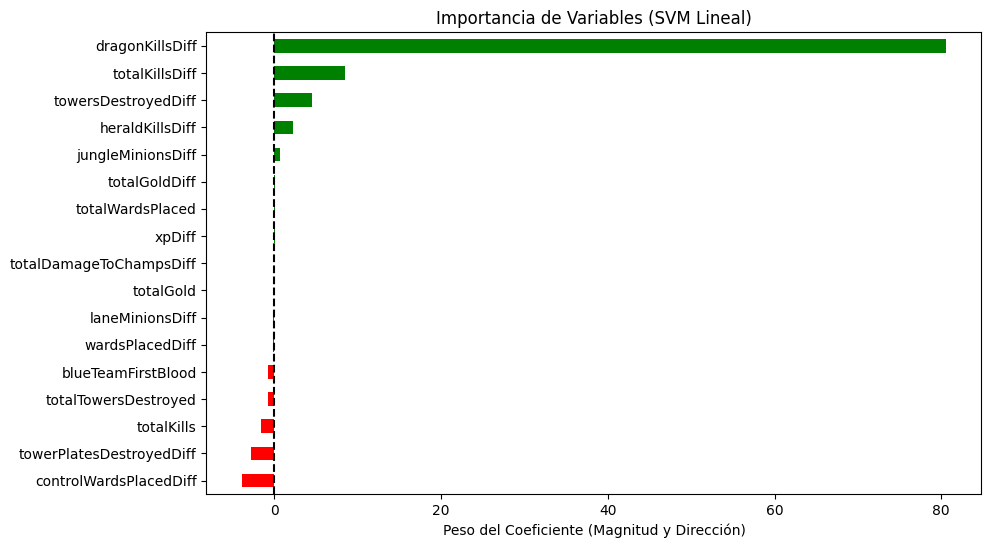

In [10]:
params={'kernel':'linear', 'C':0.1}
coeficientes = (best_dt.coef_.flatten())
feat_imp = pd.Series(coeficientes, index=X_train.columns).sort_values()
plt.figure(figsize=(10, 6))
feat_imp.plot(kind='barh', color=np.where(feat_imp > 0, 'green', 'red'))
plt.title("Importancia de Variables")
plt.xlabel("Peso del Coeficiente")
plt.axvline(x=0, color='black', linestyle='--') 
plt.show()

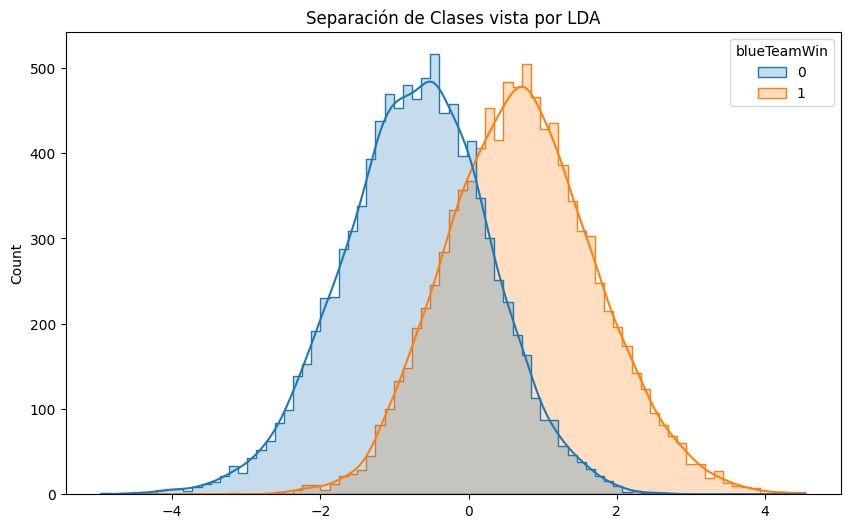

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


lda = LinearDiscriminantAnalysis(n_components=1) 
X_lda = lda.fit_transform(X_train, y_train)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(x=X_lda.flatten(), hue=y_train, kde=True, element="step")
plt.title("Separación de Clases vista por LDA")
plt.show()